# Analyzing Crime in Los Angeles 

Los Angeles, California. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. 

## Objective 

Analyze crime data to identify patterns in criminal behavior. 

## The Data

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [35]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Files
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [36]:
# Check the data types of the columns
crimes.dtypes

DR_NO                    int64
Date Rptd       datetime64[ns]
DATE OCC        datetime64[ns]
TIME OCC                object
AREA NAME               object
Crm Cd Desc             object
Vict Age                 int64
Vict Sex                object
Vict Descent            object
Weapon Desc             object
Status Desc             object
LOCATION                object
dtype: object

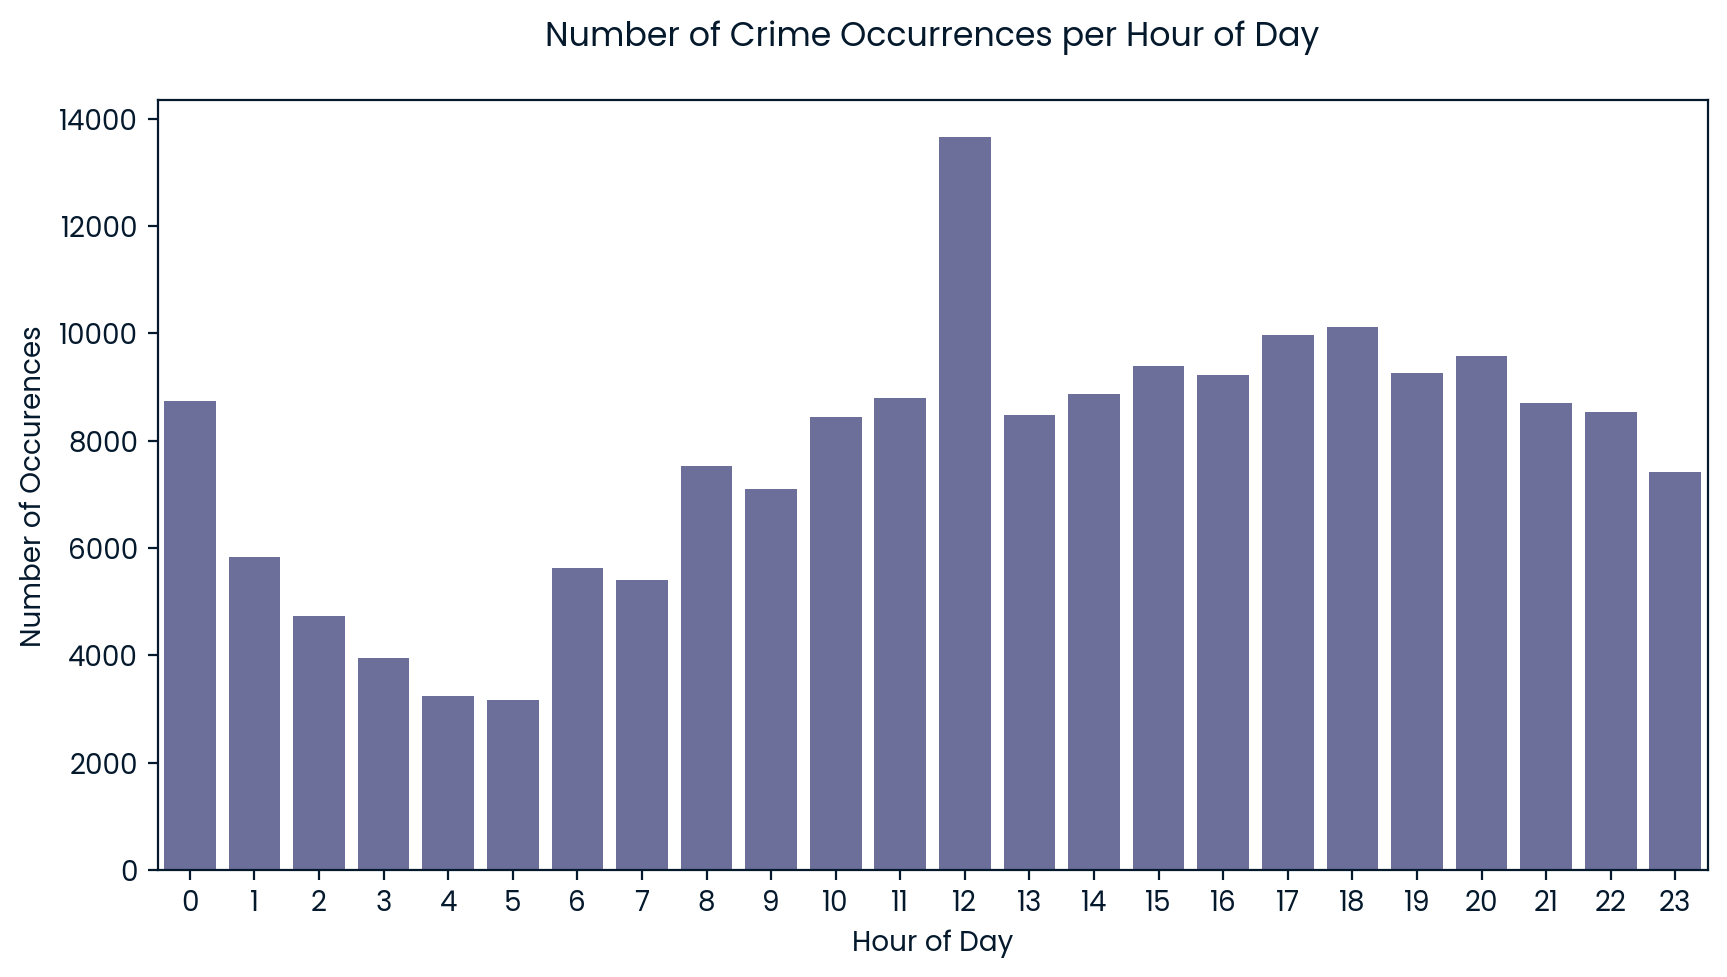

In [37]:
# ----------------------------------------------------- # 
# Hour of the day with the highest frequency of crimes
# ----------------------------------------------------- # 

# Extract the hour from the time of occurance
crimes['HOUR_OF_DAY'] = crimes['TIME OCC'].str[:2].astype(int)

# Count occurrances based on hour of day 
crimes_by_hour_srt = crimes['HOUR_OF_DAY'].value_counts(ascending=False)
crimes_by_hour_srt = crimes_by_hour_srt.reset_index()
crimes_by_hour_srt = crimes_by_hour_srt.rename(columns={'index':'Hour of day','HOUR_OF_DAY':'Crime count'})

# Store as int 
peak_crime_hour = int(crimes_by_hour_srt['Hour of day'].loc[0])

# Plot distributions 
plt.figure(figsize=(10,5))
g = sns.barplot(data=crimes_by_hour_srt, x='Hour of day',y='Crime count')
g.set_title('Number of Crime Occurrences per Hour of Day',y=1.05)
g.set(ylabel='Number of Occurences',xlabel='Hour of Day')
plt.show()

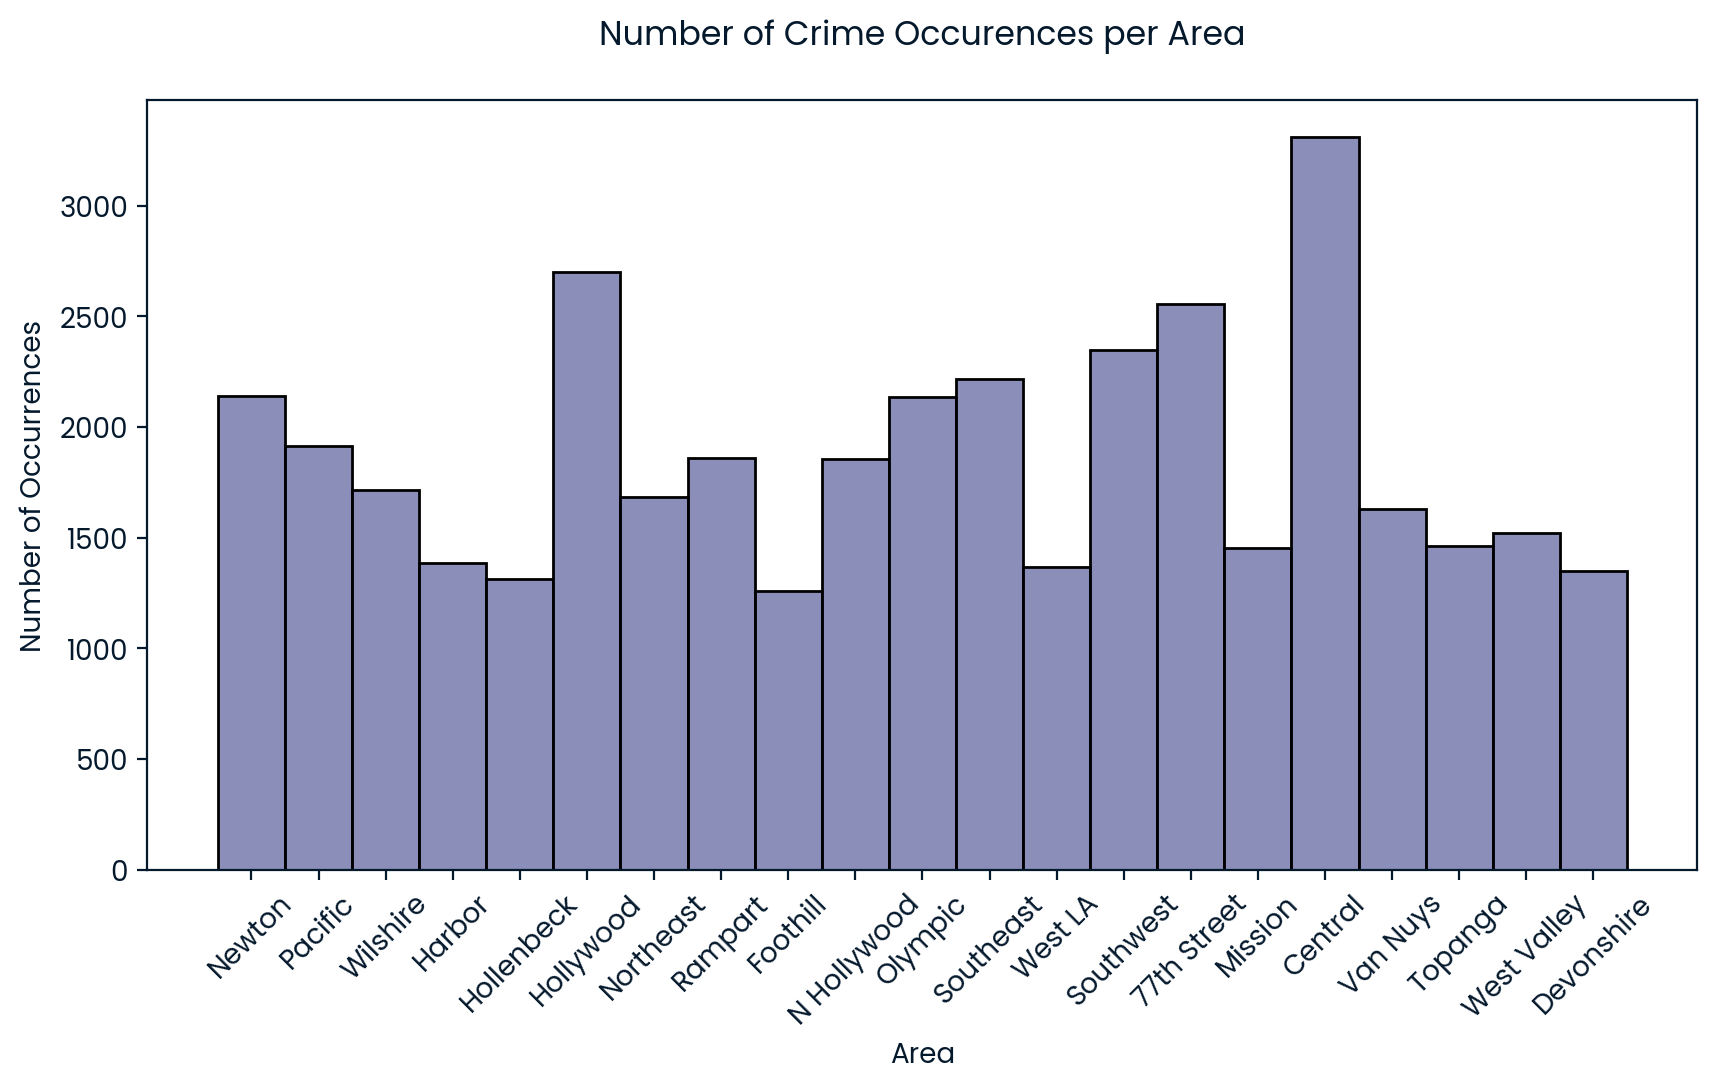

In [38]:
# ----------------------------------------------------- # 
# Area with largest frequency of night crimes
# ----------------------------------------------------- # 

# Create subsets for before midnight and after midnight
night_crime1 = crimes[crimes['HOUR_OF_DAY'] >= 22]
night_crime2 = crimes[crimes['HOUR_OF_DAY'] < 4]

# Concatenate subsets as new df
night_crime_df = pd.concat([night_crime1,night_crime2])

# Count frequency of night crimes per area and store highest value 
peak_night_crime_location = night_crime_df['AREA NAME'].value_counts(ascending=False).index[0]

# Plot frequency of night crimes per area
plt.figure(figsize=(10,5))
g = sns.histplot(data=night_crime_df,x='AREA NAME')
plt.xticks(rotation=45)
g.set(xlabel='Area',ylabel='Number of Occurrences')
g.set_title('Number of Crime Occurences per Area',y=1.05)
plt.show()

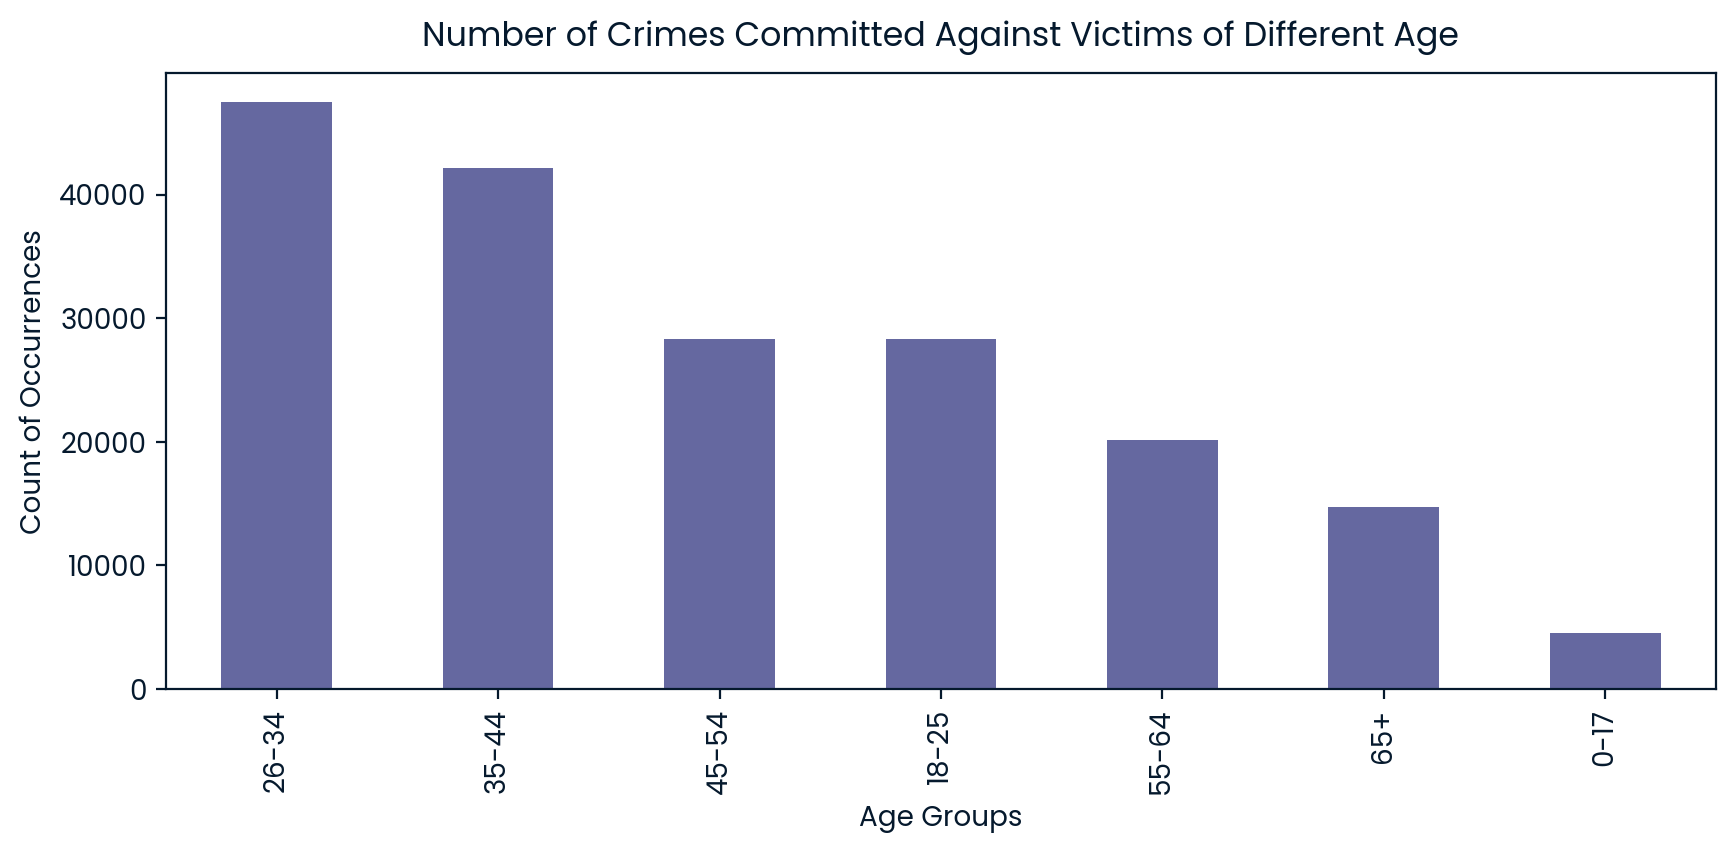

In [43]:
# --------------------------------------------------------- # 
# Crimes commited against victims of different age groups
# --------------------------------------------------------- # 

# Define age bins and labels 
bins = [0,18,26,35,45,55,65,100]
labels = ['0-17','18-25','26-34','35-44','45-54','55-64','65+']

# Create new column 'Age Group' based on bins
crimes['Age Group'] = pd.cut(crimes['Vict Age'],bins=bins,labels=labels,right=False)

# Group by 'Age Group' and count
victim_ages = crimes['Age Group'].value_counts()

# Plot results
plt.figure(figsize=(10,4))
victim_ages.plot(kind='bar')
plt.title('Number of Crimes Committed Against Victims of Different Age',pad=10)
plt.ylabel('Count of Occurrences')
plt.xlabel('Age Groups')
plt.show()